## Arithmetic Operations On Images

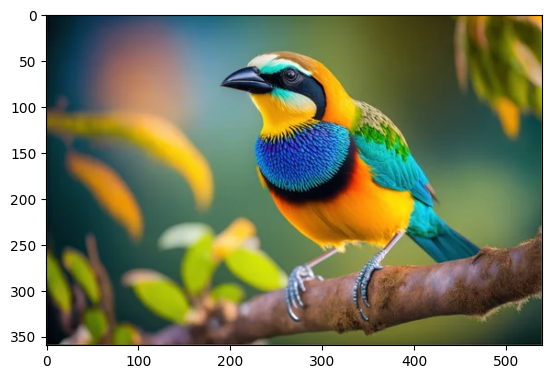

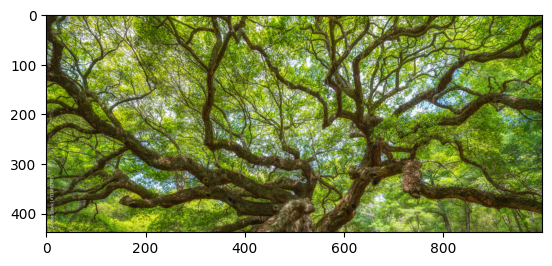

In [88]:
# Imports
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Read Image
bird = cv.imread('bird.jpg')
bird = cv.cvtColor(bird, cv.COLOR_BGR2RGB)
tree = cv.imread('tree.jpg')
tree = cv.cvtColor(tree, cv.COLOR_BGR2RGB)
# View Image
plt.imshow(bird)
plt.show()
plt.imshow(tree)
plt.show()

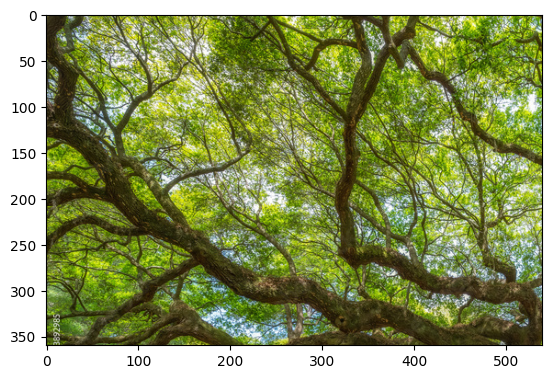

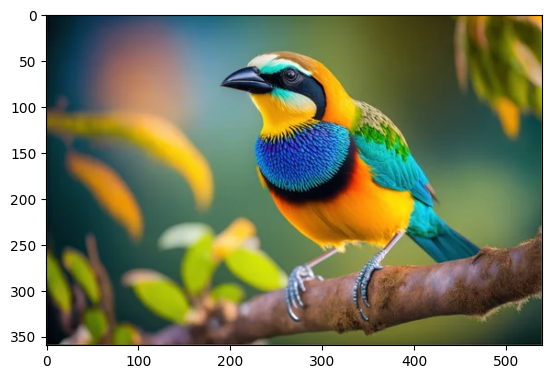

(<matplotlib.image.AxesImage at 0x783c216a2320>, None)

In [89]:
# crop images to similar size
y,x,_ = bird.shape
tree = tree[0:y,0:x]
plt.imshow(tree),plt.show()
plt.imshow(bird),plt.show()

## Image Addition

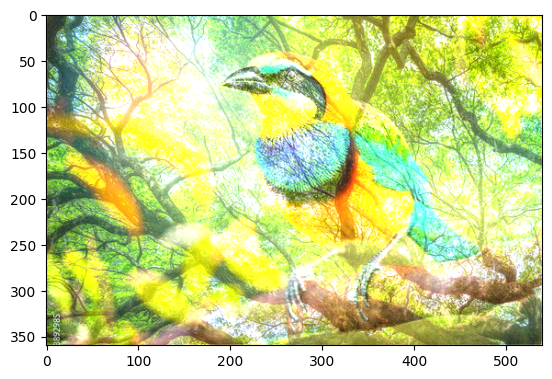

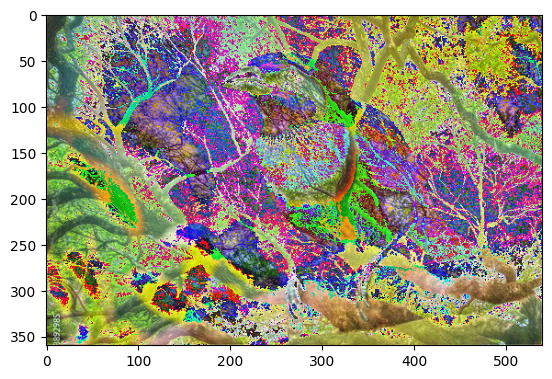

(<matplotlib.image.AxesImage at 0x783c21058e80>, None)

In [90]:
# You can add two images with the OpenCV function, cv.add(), or simply by the numpy operation res = img1 + img2.
# Both images should be of same depth and type, or the second image can just be a scalar value.

res1 = cv.add(bird,tree)
res2 = bird + tree
plt.imshow(res1),plt.show()
plt.imshow(res2),plt.show()


In [91]:
#Note
# There is a difference between OpenCV addition and Numpy addition. OpenCV addition is a saturated operation while Numpy addition is a modulo operation.
# This will be more visible when you add two images. Stick with OpenCV functions, because they will provide a better result.

## Image Blending

In [92]:
# This is also image addition, but different weights are given to images in order to give a feeling of blending or transparency
#  Images are added as per the equation below:
# By varying from 0 to 1, you can perform a cool transition between one image to another.

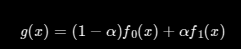

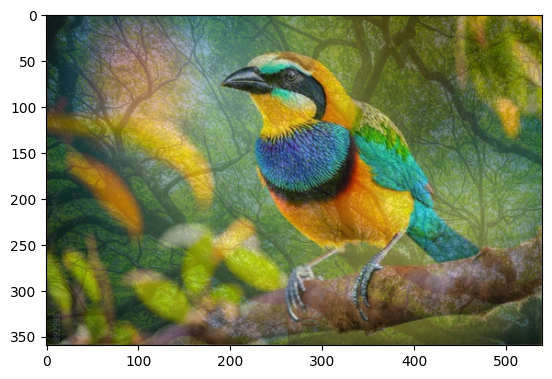

In [93]:
# now lets blend the two images
result = cv.addWeighted(bird,0.7,tree,0.3,0)
plt.imshow(result)

## Bitwise Operations

In [94]:
# This includes the bitwise AND, OR, NOT, and XOR operations.

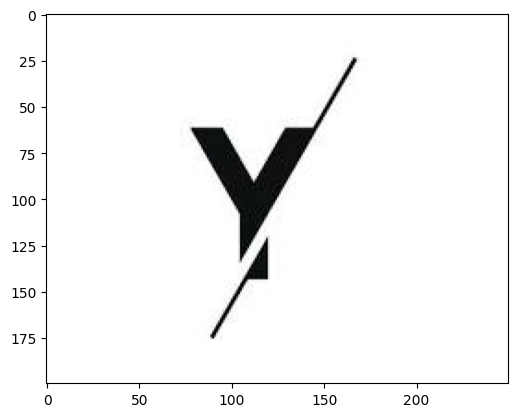

In [95]:
# Load two images
img1 = bird
img2 = cv.imread('logo.jpg')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
plt.imshow(img2)

In [96]:
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]


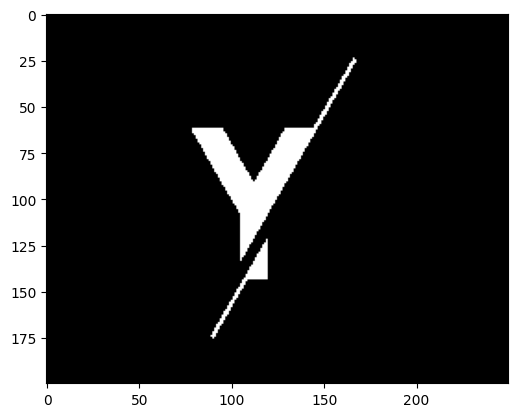

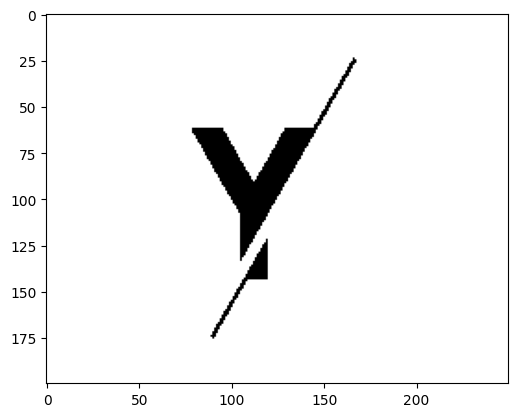

(<matplotlib.image.AxesImage at 0x783c20fcd7e0>, None)

In [97]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)

ret, mask = cv.threshold(img2gray, 127, 255, cv.THRESH_BINARY)
plt.imshow(mask,cmap='binary'),plt.show()
mask_inv = cv.bitwise_not(mask)
plt.imshow(mask_inv,cmap='binary'),plt.show()

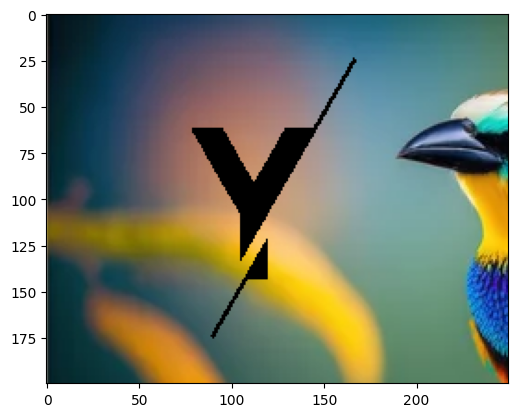

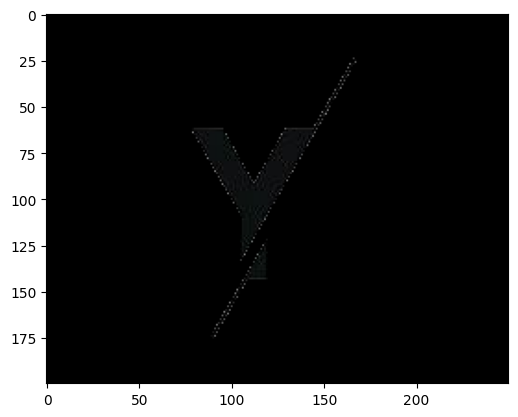

(<matplotlib.image.AxesImage at 0x783c20eb32b0>, None)

In [98]:
# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask)
plt.imshow(img1_bg,cmap='binary'),plt.show()
# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2,img2,mask = mask_inv)
plt.imshow(img2_fg,cmap='binary'),plt.show()

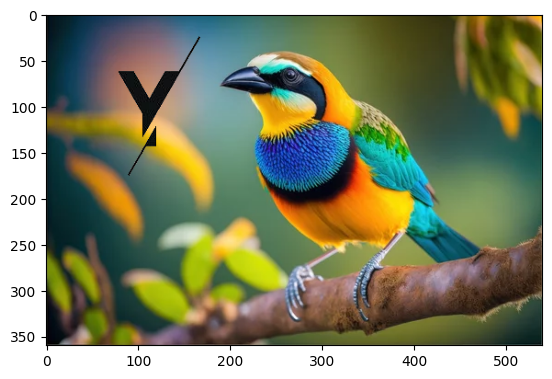

In [99]:
# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst


plt.imshow(img1)